201984058 조강표

현결과물을 중간결과물과 비교하면

교수님께서 년도를 추가하라는 조언을 하셔서 기존의 월별 교통사고 자료를 년도별, 월별 교통사고 자료로 확장했습니다.

전처리에서 데이터의 크기를 줄여 메모리의 부담을 줄였습니다.

그리고 사고건수와 사망자수의 비율, 총피해자수를 분석하는 것도 추가했습니다.

전처리를 끝내고 시각화하는 작업도 추가했습니다.

시각화를 통해 여러 각도로 데이터 분석을 쉽게 할 수 있게 됐습니다.

판다스와 넘파이를 불러옵니다.

In [599]:
import pandas as pd
import numpy as np

read_csv를 이용하여 분석할 csv 파일을 불러옵니다.

In [600]:
df = pd.read_csv('5개년 월별 교통사고.csv')
df

,년,월,사고건수,사망자수,부상자수
0,2019,01월,16552,296,24269
1,2019,02월,14752,203,22612
2,2019,03월,18133,252,26908
3,2019,04월,19104,286,28438
4,2019,05월,20779,305,31077
5,2019,06월,18968,279,28315
6,2019,07월,19234,241,28353
7,2019,08월,19992,253,30358
8,2019,09월,19331,287,28746
9,2019,10월,21690,337,32050


데이터 분석을 위해 먼저 행과 열의 개수를 파악하고 상위 5개 하위 5개 데이터를 분석합니다.

In [601]:
df.shape

(60, 5)

60개의 행과 5개의 열을 가진 데이터라는 것을 파악할 수 있습니다.

In [602]:
df.head()

,년,월,사고건수,사망자수,부상자수
0,2019,01월,16552,296,24269
1,2019,02월,14752,203,22612
2,2019,03월,18133,252,26908
3,2019,04월,19104,286,28438
4,2019,05월,20779,305,31077


In [603]:
df.tail()

,년,월,사고건수,사망자수,부상자수
55,2015,08월,19864,405,30618
56,2015,09월,20811,387,31256
57,2015,10월,21587,470,32436
58,2015,11월,21170,410,31773
59,2015,12월,19290,402,28937


년과 월의 행 형식이 다릅니다. 형식을 통일시켜주면 더 파악하기 쉬우므로 일치시켜줍니다.

일치시켜주기 위해 월에도 숫자 옆에 월이란 글자를 지워줍니다.

In [604]:
import re
#정규표현식 라이브러리를 불러옵니다.
def get_number(text):
    return re.sub('[^0-9]', '', text)
#[^0-9]는 정규표현식으로 0-9가 아닌 것을 뜻합니다.
#즉, 숫자가 아닌것은 제거하겠다는 것입니다.

In [605]:
#map함수를 이용해 사용자 정의함수를 적용시켜줍니다.
df['월'] = df['월'].map(get_number)
df

,년,월,사고건수,사망자수,부상자수
0,2019,01,16552,296,24269
1,2019,02,14752,203,22612
2,2019,03,18133,252,26908
3,2019,04,19104,286,28438
4,2019,05,20779,305,31077
5,2019,06,18968,279,28315
6,2019,07,19234,241,28353
7,2019,08,19992,253,30358
8,2019,09,19331,287,28746
9,2019,10,21690,337,32050


위와 같이 년과 월의 형식이 같아진 것을 볼 수 있습니다.

더 파악하기 위해 info()함수를 이용해 분석합니다.

In [606]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년       60 non-null     int64 
 1   월       60 non-null     object
 2   사고건수    60 non-null     int64 
 3   사망자수    60 non-null     int64 
 4   부상자수    60 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.5+ KB


월의 데이터 타입이 오브젝트인 것을 알 수 있습니다. 

월의 데이터 타입을 정수형으로 변환합니다.

In [607]:
#먼저 정수형으로 변환시켜줍니다.
df = df.astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   년       60 non-null     int64
 1   월       60 non-null     int64
 2   사고건수    60 non-null     int64
 3   사망자수    60 non-null     int64
 4   부상자수    60 non-null     int64
dtypes: int64(5)
memory usage: 2.5 KB


모든 데이터 타입이 같아져 분석하기 편한 상태가 됐습니다.

정수형의 크기를 바꿔 메모리의 부담을 감소시키는 것이 좋겠습니다.

In [608]:
#값의 크기를 줄여줍니다.
df = df.astype('int32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   년       60 non-null     int32
 1   월       60 non-null     int32
 2   사고건수    60 non-null     int32
 3   사망자수    60 non-null     int32
 4   부상자수    60 non-null     int32
dtypes: int32(5)
memory usage: 1.3 KB


1.3/2.5 * 100 = 52, int64의 52%로 메모리의 부담이 감소했습니다.

In [609]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
년,60.0,2017.000000,1.426148,2015.0,2016.00,2017.0,2018.00,2019.0
월,60.0,6.500000,3.481184,1.0,3.75,6.5,9.25,12.0
사고건수,60.0,18600.583333,1566.614619,14752.0,17969.25,18665.5,19476.00,21690.0
사망자수,60.0,337.133333,53.589927,203.0,296.75,336.5,375.75,470.0
부상자수,60.0,27828.300000,2280.846730,22323.0,26563.00,28008.5,29015.25,32436.0


통계값에 년,월이 포함되어 있습니다. 필요한 통계값만을 위해 필요한 컬럼만을 추출합니다.

In [610]:
#변수 st에 분석할 자료들을 담아준 뒤 분석합니다.
st = df[['사고건수', '사망자수', '부상자수']]
st.describe().T

,count,mean,std,min,25%,50%,75%,max
사고건수,60.0,18600.583333,1566.614619,14752.0,17969.25,18665.5,19476.00,21690.0
사망자수,60.0,337.133333,53.589927,203.0,296.75,336.5,375.75,470.0
부상자수,60.0,27828.300000,2280.846730,22323.0,26563.00,28008.5,29015.25,32436.0


사고건수 대비 사망자수의 비율과 총피해자수는 몇 명인지 구하겠습니다.

In [611]:
#변수 df1에 복사해준 뒤 내림차순으로 정렬해줍니다.
df1 = df.copy()
df1 = df.sort_values(by='사망자수', ascending=False)
df1.head()

,년,월,사고건수,사망자수,부상자수
57,2015,10,21587,470,32436
45,2016,10,19918,440,29635
33,2017,10,18863,420,28698
32,2017,9,19891,419,29371
46,2016,11,19234,416,28520


In [612]:
#사고건수대비사망을 구하는 컬럼을 추가해 분석합니다.
df1['사고건수대비사망'] = df1['사망자수'] / df1['사고건수'] * 100
df1

,년,월,사고건수,사망자수,부상자수,사고건수대비사망
57,2015,10,21587,470,32436,2.177236
45,2016,10,19918,440,29635,2.209057
33,2017,10,18863,420,28698,2.226581
32,2017,9,19891,419,29371,2.106480
46,2016,11,19234,416,28520,2.162837


In [613]:
#총피해자수를 구하는 컬럼을 추가해 분석합니다.
df1['총피해자수'] = df1['부상자수'] + df1['사망자수']
df1

,년,월,사고건수,사망자수,부상자수,사고건수대비사망,총피해자수
57,2015,10,21587,470,32436,2.177236,32906
45,2016,10,19918,440,29635,2.209057,30075
33,2017,10,18863,420,28698,2.226581,29118
32,2017,9,19891,419,29371,2.106480,29790
46,2016,11,19234,416,28520,2.162837,28936
58,2015,11,21170,410,31773,1.936703,32183
47,2016,12,18869,408,28192,2.162277,28600
55,2015,8,19864,405,30618,2.038864,31023
59,2015,12,19290,402,28937,2.083981,29339
53,2015,6,18649,390,27469,2.091265,27859


In [636]:
#내림차순으로 사고건수대비사망이 가장 큰 순서부터 나오도록 합니다.
df1.sort_values('사고건수대비사망', ascending=False).head()

,년,월,사고건수,사망자수,부상자수,사고건수대비사망,총피해자수
48,2015,1,16902,381,25887,2.254171,26268
33,2017,10,18863,420,28698,2.226581,29118
45,2016,10,19918,440,29635,2.209057,30075
57,2015,10,21587,470,32436,2.177236,32906
46,2016,11,19234,416,28520,2.162837,28936


In [642]:
#오름차순으로 사고건수대비사망이 가장 작은 순서부터 나오게 합니다.
df1.sort_values('사고건수대비사망').head()

,년,월,사고건수,사망자수,부상자수,사고건수대비사망,총피해자수
6,2019,7,19234,241,28353,1.252989,28594
7,2019,8,19992,253,30358,1.265506,30611
1,2019,2,14752,203,22612,1.376085,22815
10,2019,11,21517,297,31623,1.380304,31920
2,2019,3,18133,252,26908,1.389731,27160


위 두개의 결과로 알 수 있듯이 

가장 많은 사고건수대비사망의 비율은 2015년 1월의 2.25정도이고


가장 적은 사고건수대비사망의 비율은 2019년 7월의 1.23정도 입니다.

In [637]:
#내림차순으로 가장 큰 수부터 정렬합니다.
df1.sort_values('총피해자수', ascending=False).head()

,년,월,사고건수,사망자수,부상자수,사고건수대비사망,총피해자수
57,2015,10,21587,470,32436,2.177236,32906
9,2019,10,21690,337,32050,1.553711,32387
58,2015,11,21170,410,31773,1.936703,32183
10,2019,11,21517,297,31623,1.380304,31920
52,2015,5,20543,389,31264,1.893589,31653


In [639]:
#오름차순으로 가장 작은 수부터 정렬합니다.
df1.sort_values('총피해자수').head()

,년,월,사고건수,사망자수,부상자수,사고건수대비사망,총피해자수
25,2017,2,14832,280,22323,1.887810,22603
1,2019,2,14752,203,22612,1.376085,22815
49,2015,2,14939,296,22999,1.981391,23295
37,2016,2,15664,292,24021,1.864147,24313
0,2019,1,16552,296,24269,1.788304,24565



가장 많은 총피해자수는 2015년 10월의 32906명이고

가장 적은 총피해자수는 2019년 1월의 24565명입니다.

가장 많은 총피해자수와 사망자비율이 있는 해는 2015년이고

가장 적은 총피해자수와 사장바비율이 있는 해는 2019년입니다.

In [659]:
#describe()함수도 이용해 통계치를 한 눈에 파악합니다.
st2 = df1[['사고건수', '사망자수', '부상자수', '사고건수대비사망', '총피해자수']]
st2.describe().T

,count,mean,std,min,25%,50%,75%,max
사고건수,60.0,18600.583333,1566.614619,14752.000000,17969.250000,18665.500000,19476.000000,21690.000000
사망자수,60.0,337.133333,53.589927,203.000000,296.750000,336.500000,375.750000,470.000000
부상자수,60.0,27828.300000,2280.846730,22323.000000,26563.000000,28008.500000,29015.250000,32436.000000
사고건수대비사망,60.0,1.813514,0.247965,1.252989,1.677582,1.826173,1.971075,2.254171
총피해자수,60.0,28165.433333,2308.594204,22603.000000,26835.750000,28326.000000,29384.000000,32906.000000


위와 같이 decribe를 이용해 여러 자료들의 여러 통계값을 한 눈에 파악할 수 있습니다.

년도별, 월별 사망자수를 시각화하겠습니다.

In [615]:
#matplotlib라이브러리를 불러옵니다.
import matplotlib.pyplot as plt
#글자가 깨지는 것을 방지하기 위해 폰트는 맑은 고딕으로 설정합니다.
plt.rc('font', family='Malgun Gothic')

In [651]:
#그룹함수를 이용해 년도별 사망자수를 구합니다.
#sum()을 이용하면 같은 년도의 합을 구할 수 있습니다.
year = df.groupby('년')['사망자수'].sum()
year

년
2015    4621
2016    4292
2017    4185
2018    3781
2019    3349
Name: 사망자수, dtype: int32

년도별 사망자수를 파악했으니 시각화 해줍니다.

<AxesSubplot:xlabel='년'>

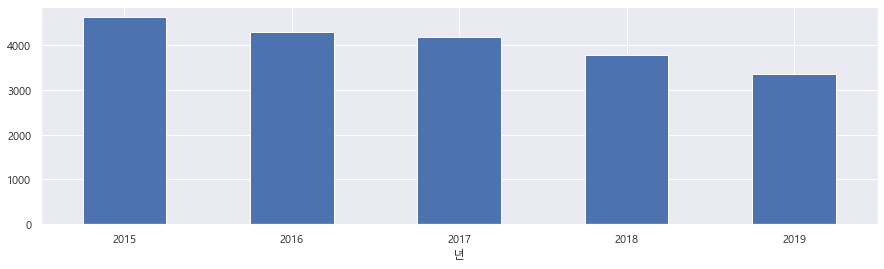

In [617]:
#파악하기 쉽게 정렬해서 시각화해줍니다.
#사망자수가 가장 많은 것을 첫번째로 나오게 합니다.
year.sort_values(ascending=False).plot.bar(figsize=(15, 4), rot=0)

해가 갈수록 교통사고의 사망자수가 줄어드는 긍정적인 결과를 도출해낼 수 있습니다.

월별 사망자도 분석합니다.

In [652]:
#year와 마찬가지로 그룹함수와 sum()을 이용하면 월별 사망자수를 파악할 수 있습니다
month = df.groupby('월')['사망자수'].sum()
month

월
1     1670
2     1346
3     1545
4     1589
5     1716
6     1571
7     1630
8     1704
9     1816
10    2040
11    1800
12    1801
Name: 사망자수, dtype: int32

<AxesSubplot:ylabel='월'>

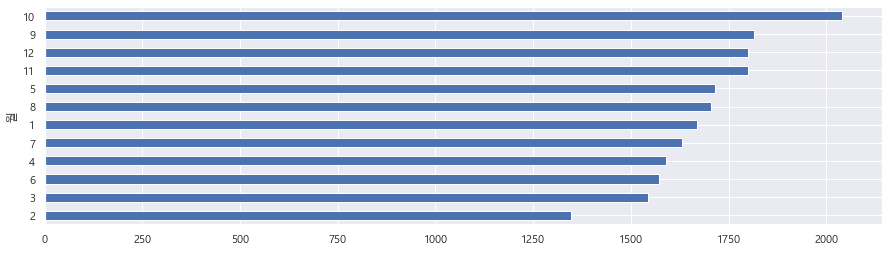

In [653]:
#bar함수를 사용해서 한 눈에 파악할 수 있습니다. 가로로 보이게 barh를 사용해서 시각화합니다.
month.sort_values().plot.barh(figsize=(15, 4), rot=0)
#figsize는 그래프의 크기를 rot는 x축 글자의 회전정도를 나타냅니다.

10월이 가장 많고 2월이 가장 적습니다.


눈에 띄는 건 9월~12월에 사망자수가 많다는 것이고


2,3,6월에 사망자수가 적다는 것입니다.


9월~12월 사이에 사망자수가 가장 많으므로 이 때 사고를 조심하는게 좋습니다.

년도와 월을 합쳐서 날짜(년도, 월)별로 시각화를 하겠습니다.

In [654]:
#원본 데이터를 그대로 보존하기 위해 다른 변수에 df를 복사합니다.
df2 = df.copy()
df2

,년,월,사고건수,사망자수,부상자수
0,2019,1,16552,296,24269
1,2019,2,14752,203,22612
2,2019,3,18133,252,26908
3,2019,4,19104,286,28438
4,2019,5,20779,305,31077
5,2019,6,18968,279,28315
6,2019,7,19234,241,28353
7,2019,8,19992,253,30358
8,2019,9,19331,287,28746
9,2019,10,21690,337,32050


날짜 컬럼을 만들어보겠습니다.

In [655]:
#str와 map함수를 이용해 년과 월을 합쳐 날짜 컬럼을 만듭니다. 보기 쉽게 년과 월 사이에 '-'를 붙여줍니다.
df2['날짜'] = df2['년'].map(str) + '-' + df2['월'].map(str)
df2

,년,월,사고건수,사망자수,부상자수,날짜
0,2019,1,16552,296,24269,2019-1
1,2019,2,14752,203,22612,2019-2
2,2019,3,18133,252,26908,2019-3
3,2019,4,19104,286,28438,2019-4
4,2019,5,20779,305,31077,2019-5
5,2019,6,18968,279,28315,2019-6
6,2019,7,19234,241,28353,2019-7
7,2019,8,19992,253,30358,2019-8
8,2019,9,19331,287,28746,2019-9
9,2019,10,21690,337,32050,2019-10


날짜를 맨 앞에 두고 년과 월은 지우는게 좋겠습니다.

In [622]:
#필요한 컬럼만으로 정리합니다.
df2 = df2[['날짜', '사고건수', '사망자수', '부상자수']]
df2

,날짜,사고건수,사망자수,부상자수
0,2019-1,16552,296,24269
1,2019-2,14752,203,22612
2,2019-3,18133,252,26908
3,2019-4,19104,286,28438
4,2019-5,20779,305,31077
5,2019-6,18968,279,28315
6,2019-7,19234,241,28353
7,2019-8,19992,253,30358
8,2019-9,19331,287,28746
9,2019-10,21690,337,32050


<AxesSubplot:xlabel='날짜'>

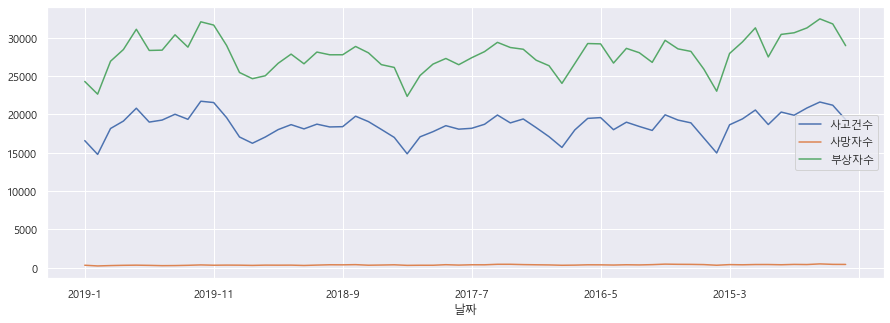

In [623]:
#날짜를 인덱스화 하여 x축으로 설정해 사고건수, 사망자수, 부상자수를 파악합니다.
df2.set_index('날짜').plot(figsize=(15, 5))

사고건수, 사망자수, 부상자수를 한 눈에 파악할 수 있습니다.


사고건수에 비해 사망자수가 더 많습니다.


교통사고는 하나이지만 다치는 사람은 여러 명이므로 교통사고 안나게 조심하는 것이 좋습니다.

seaborn 라이브러리를 이용해 데이터를 더 분석하겠습니다.

In [624]:
#seaborn 라이브러리를 불러온 후 폰트는 맑은 고딕으로 설정합니다.
import seaborn as sns
sns.set(font="Malgun Gothic")

<AxesSubplot:xlabel='날짜', ylabel='사망자수'>

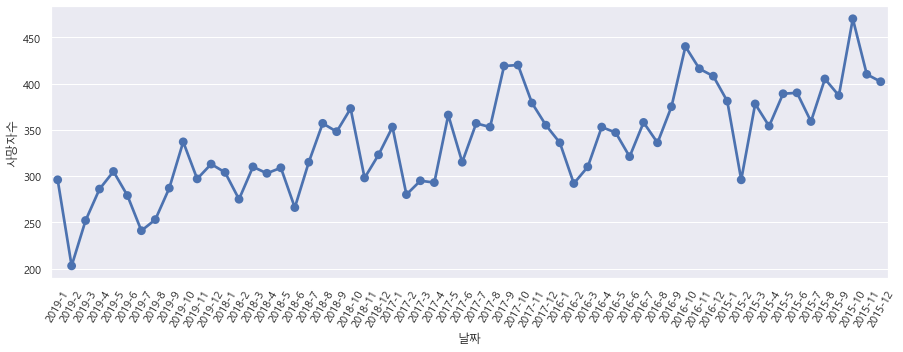

In [625]:
#plt.xticks을 이용해 x축의 글자 회전을 설정해주면 겹침없이 볼 수 있습니다.
plt.figure(figsize=(15, 5))
plt.xticks(rotation=60)
sns.pointplot(data=df2, x='날짜', y='사망자수')

교통사고의 사망자수가 상승했다 하락했다 반복하며 해가 거듭할 수록 사망자의 수는 감소하는 것을 볼 수 있습니다.

긍정적인 결과입니다.


분석할 데이터의 수를 줄여 사망자수의 상위 10개만을 분석합니다.

In [626]:
#사망자수의 상위 10개 값만을 파악하도록 합니다.
df3 = df2.sort_values('사망자수', ascending=False)
df3.head(10)

,날짜,사고건수,사망자수,부상자수
57,2015-10,21587,470,32436
45,2016-10,19918,440,29635
33,2017-10,18863,420,28698
32,2017-9,19891,419,29371
46,2016-11,19234,416,28520
58,2015-11,21170,410,31773
47,2016-12,18869,408,28192
55,2015-8,19864,405,30618
59,2015-12,19290,402,28937
53,2015-6,18649,390,27469


In [627]:
#top10변수를 만듭니다.
top10 = df3.head(10)
top10

,날짜,사고건수,사망자수,부상자수
57,2015-10,21587,470,32436
45,2016-10,19918,440,29635
33,2017-10,18863,420,28698
32,2017-9,19891,419,29371
46,2016-11,19234,416,28520
58,2015-11,21170,410,31773
47,2016-12,18869,408,28192
55,2015-8,19864,405,30618
59,2015-12,19290,402,28937
53,2015-6,18649,390,27469


<AxesSubplot:xlabel='날짜', ylabel='사망자수'>

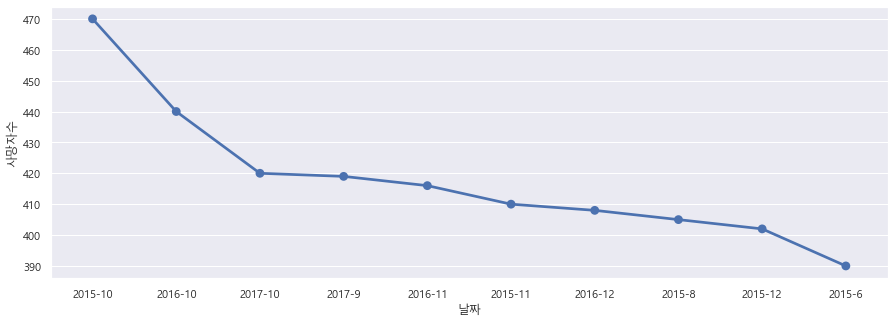

In [628]:
plt.figure(figsize=(15, 5))
sns.pointplot(data=top10, x='날짜', y='사망자수')

2015년 10월에 가장 많은 교통사고 사망자가 있었다는 걸 알 수 있습니다.

2017-10까지 그래프가 급격히 감소한 후 완만히 감소하고 있습니다.

하지만 2015년부터 2017년 모두 10월에 가장 많은 사망자 수가 있었으므로 

교통사고를 특히 10월달에 조심하는게 사망은 면하는 것이라는 것을 알 수 있습니다.


이어서 교통사고의 사고건수와 총피해자수를 한 그래프에 시각화 하여


사고건수에 비해 총 피해자수는 몇 명인지 분석합니다.

In [656]:
#변수 df3에 df1의 총피해자수 컬럼을 불러옵니다.
df3['총피해자수'] = df1['총피해자수']

Text(0, 0.5, '수치')

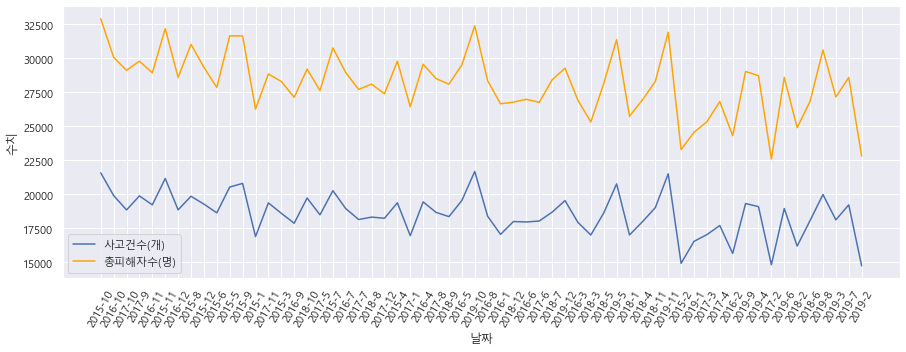

In [644]:
#부상자수와 사고건수도 파악합니다.
#한 번에 볼 수 있게 함께 시각화합니다.
#y축이 서로 다르므로 y축의 라벨명을 따로 지정합니다.
#그래프의 선이 어떤 선인지 색을 다르게 하고 파악하기 좋게 라벨을 붙여줍니다.

plt.figure(figsize=(15, 5))
plt.xticks(rotation=60)
sns.lineplot(data=df3, x='날짜', y='사고건수', label='사고건수(개)')
sns.lineplot(data=df3, x='날짜', y='총피해자수', color='orange', label='총피해자수(명)')
plt.ylabel('수치')

위 그래프에서 보이듯 사고건수에 비해 총피해자수는 훨씬 많은 것을 알 수 있습니다.

사고 하나에 피해자는 배이므로 교통사고는 최대한 조심해야 한다는 교훈을 얻을 수 있습니다.

이젠 사망자수를 년별, 월별로 한 번에 파악합니다.

<AxesSubplot:xlabel='년', ylabel='사망자수'>

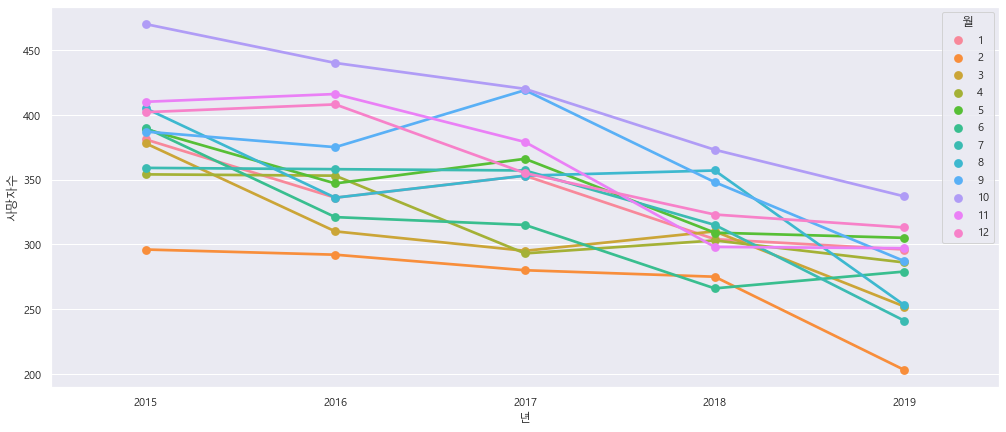

In [631]:
#이제 hue를 이용해 사망자수를 년별 월별로 한 번에 파악할 수 있게 시각화합니다.
plt.figure(figsize=(17, 7))
plt.xticks(rotation=0)
sns.pointplot(data=df, x='년', y='사망자수', hue='월')

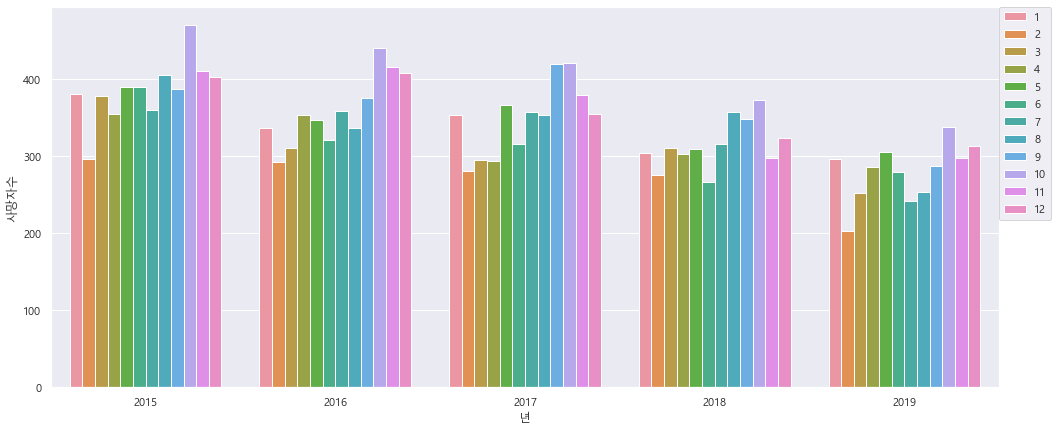

In [632]:
#막대함수도 이용해 파악합니다.
plt.figure(figsize=(17, 7))
plt.xticks(rotation=0)
sns.barplot(data=df, x='년', y='사망자수', hue='월')
#범례(legend)가 막대 값에 침범합니다. 파악하기 좋게 범례의 위치를 옮겨줍니다.
#범례(legend)의 위치를 아래와 같은 방법으로 조정할 수 있습니다.
plt.legend(loc='center right', bbox_to_anchor=(1.06, 0.72), ncol=1)

위에서 알 수 있듯 사망자는 해가 거듭할 수록 교통사고의 사망자수는 감소한다는 것을 알 수 있습니다.

그리고 교통사고의 사망자수가 가장 많은 달은 10월, 가장 적은 달은 2월이라는 것을 파악할 수 있습니다.

그러므로 사망을 면하기 위해서는 교통사고를 10월에 조심하도록 합니다.

마지막으로 사고건수도 년별, 월별로 시각화합니다.

<AxesSubplot:xlabel='년', ylabel='사고건수'>

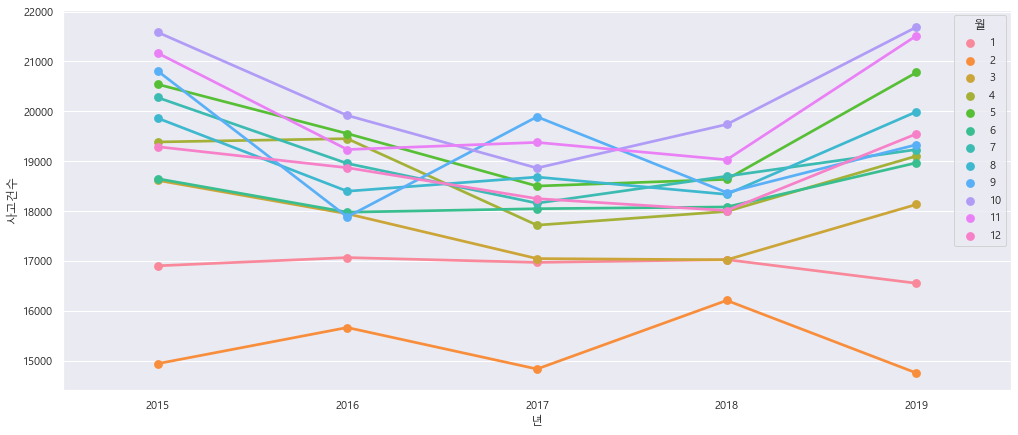

In [650]:
plt.figure(figsize=(17, 7))
plt.xticks(rotation=0)
sns.pointplot(data=df1, x='년', y='사고건수', hue='월')

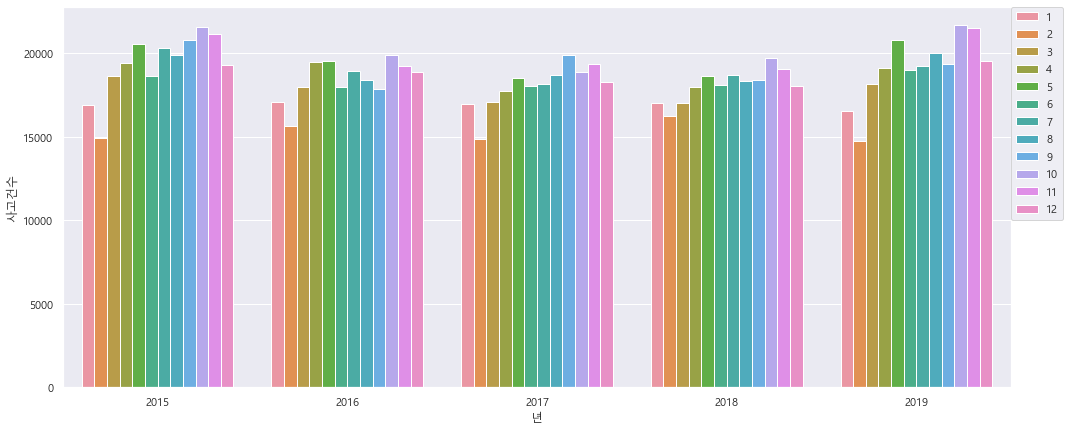

In [649]:
plt.figure(figsize=(17, 7))
plt.xticks(rotation=0)
sns.barplot(data=df1, x='년', y='사고건수', hue='월')
plt.legend(loc='center right', bbox_to_anchor=(1.06, 0.72), ncol=1)

교통사고의 사고건수 역시 해가 거듭할수록 사고건수는 감소한다는 좋은 결과 값을 도출할 수 있습니다.

사고건수가 가장 많은 달은 10월이고 가장 적은 달은 2월입니다.

사고건수의 수치와 사망자수의 수치가 가장 많은 달과 가장 적은 달은 서로 비슷하고

다른 달에도 사고건수가 많은 달에 사망자수도 많다는 것을 알 수 있습니다.

사고건수와 사망자수의 그래프 모양이 어느정도 비슷하므로 

교통사고의 사고건수를 줄이면 줄일 수록 사망자도 적어진다는 분석을 할 수 있습니다.

그러므로 모두가 교통사고를 최대한 예방하는게 좋다는 결론을 낼 수 있습니다.